In [16]:
import torch
import matplotlib.pyplot as plt

In [17]:
# DQNs without PER
agent_to_averaged_data = torch.load('./data/agent_to_averaged_data')
# agent_to_averaged_data_random = torch.load('./data/random/agent_to_averaged_data')

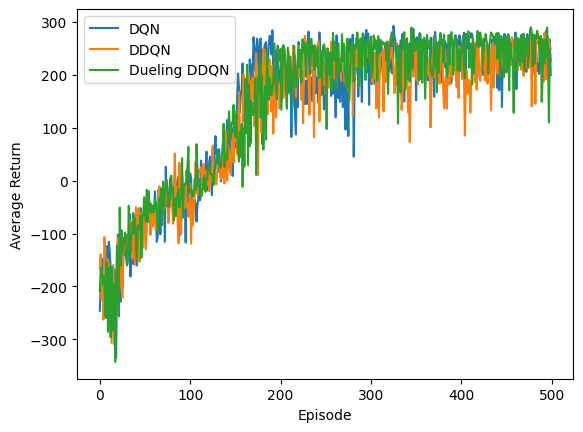

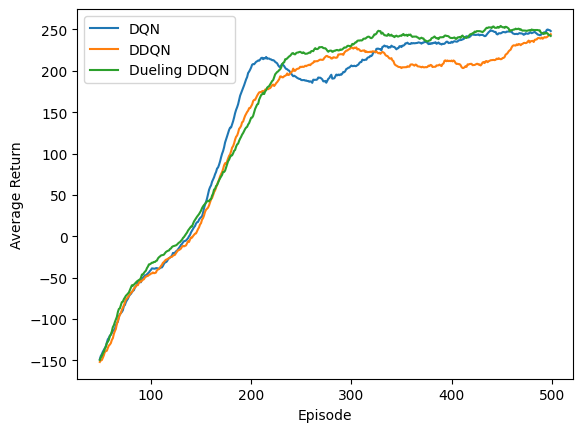

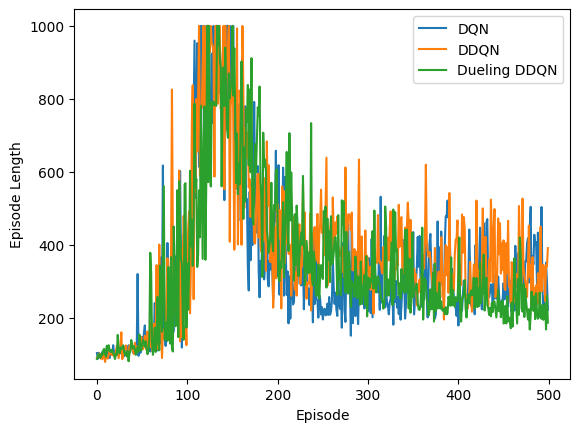

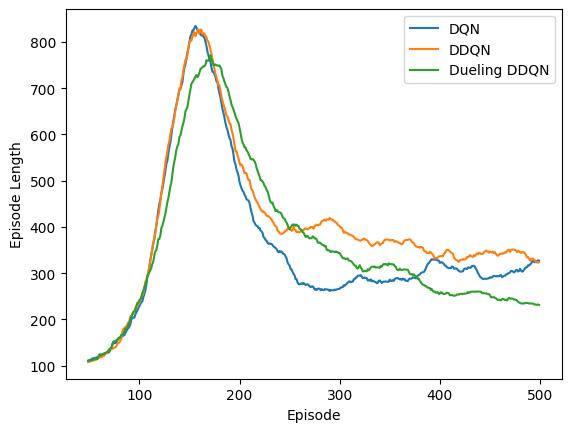

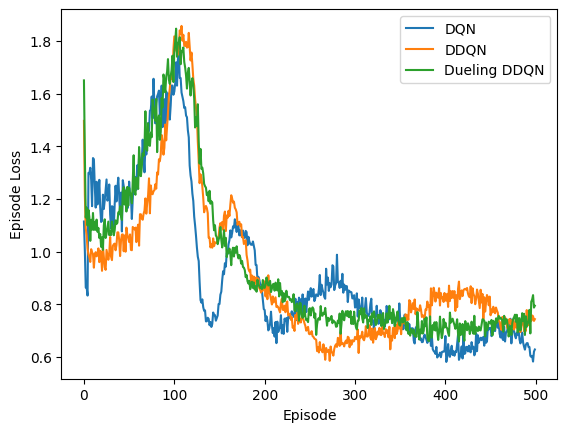

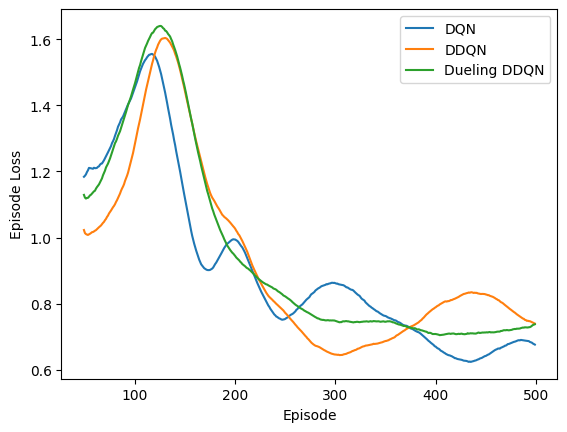

In [18]:
for plt_type in agent_to_averaged_data[list(agent_to_averaged_data.keys())[0]]:
    # for agent_name in agent_to_averaged_data:
    # agent_to_averaged_data = agent_to_averaged_data|agent_to_averaged_data_random
    for agent_name in (agent_to_averaged_data):
        data = agent_to_averaged_data[agent_name][plt_type]
        n = 50

        plt.figure(plt_type)
        plt.xlabel('Episode')
        plt_type_to_ylabel = {'episode_rewards' : 'Average Return',
                             'episode_lengths' : 'Episode Length',
                             'episode_losses' : 'Episode Loss'}
        plt.ylabel(plt_type_to_ylabel[plt_type])
        plt.plot(data, label=agent_name)
        plt.legend()
        plt.savefig('./plotting/' + plt_type)
        
        if len(data) >= n:
            smooth_data = torch.tensor(data).unfold(0, n, 1).mean(1)
            plt.figure('./plotting/' + plt_type + ' (smooth)')
            plt.xlabel('Episode')
            plt.ylabel(plt_type_to_ylabel[plt_type])
            plt.plot(range(n - 1, len(data)), smooth_data.numpy(), label=agent_name)
            plt.legend()
            plt.savefig('./plotting/' + plt_type + ' (smooth)')
        
        

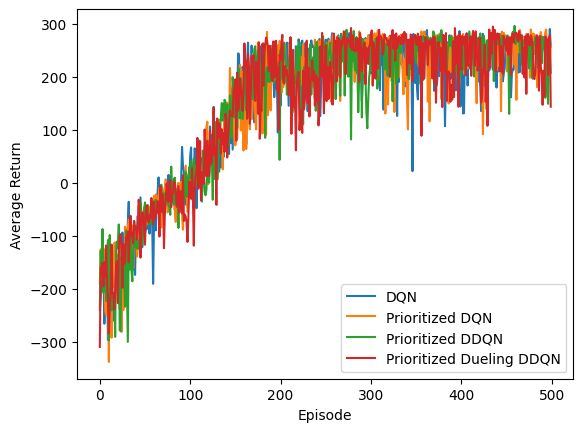

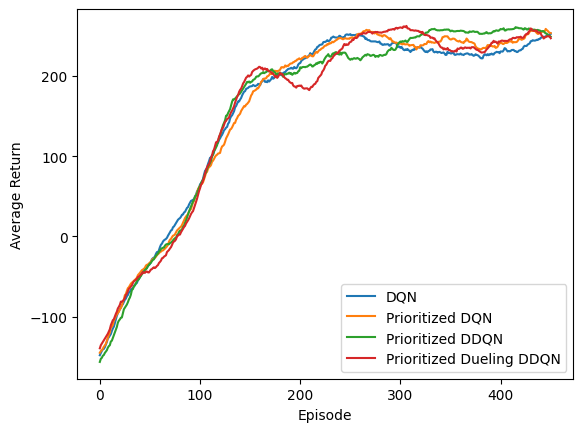

In [19]:
# DQNs with PER
categories = ['DQN', 'Prioritized DQN', 'Prioritized DDQN', 'Prioritized Dueling DDQN']

plt.figure('episode_return')
# plt.title('LunarLander Average Learning Curves')
plt.xlabel('Episode')
plt.ylabel('Average Return')
for category in categories:
    episode_rewards = torch.load(f'./data/PER/average_episode_rewards-{category}')
    plt.plot(episode_rewards, label=category)
    plt.legend()
    plt.savefig('./plotting/episode_return_PER')
    
plt.figure('episode_return (smooth)')
plt.xlabel('Episode')
plt.ylabel('Average Return')
for category in categories:
    episode_rewards = torch.load(f'./data/PER/average_episode_rewards-{category}')
    episode_rewards_smooth = torch.tensor(episode_rewards).unfold(0,50,1).mean(1)
    plt.plot(episode_rewards_smooth, label=category)
    plt.legend()
    plt.savefig('./plotting/episode_return_PER (smooth)')

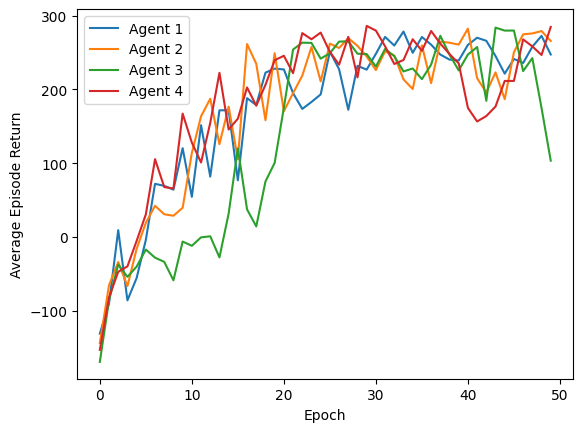

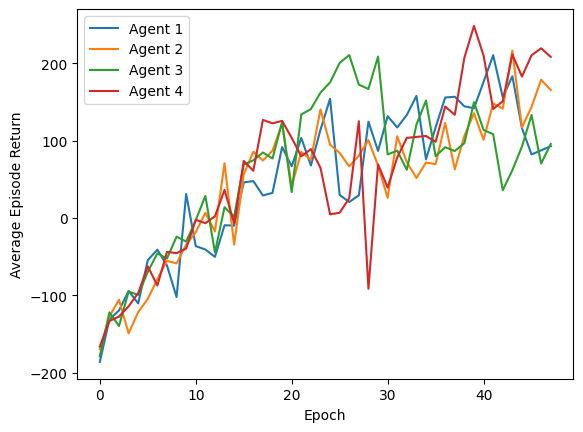

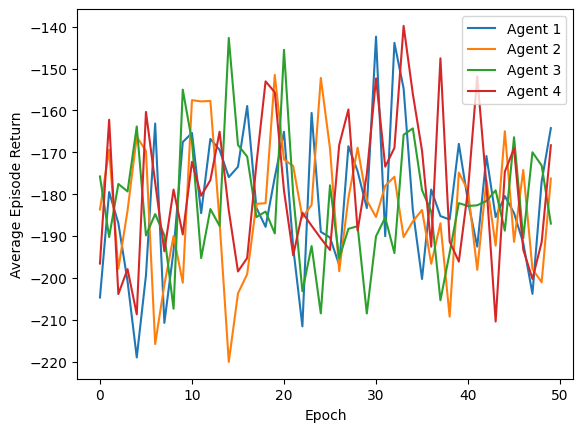

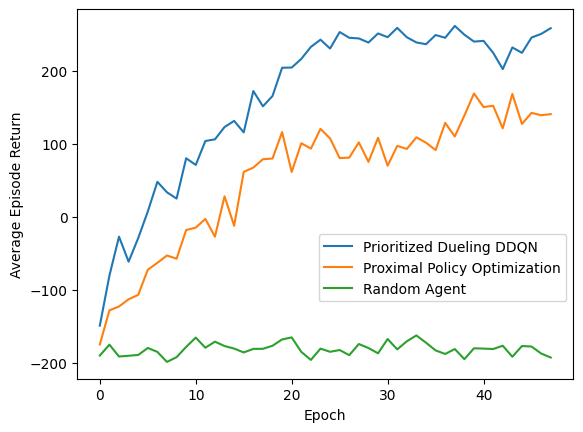

In [20]:
# PPO D3QN Comparison
# PPO data comes from the PPO part of the code
import numpy as np
epoch_reward_lists_ppo = np.load('./data/epoch/epoch_rtns.npy')
epoch_reward_list_ppo = torch.tensor(epoch_reward_lists_ppo).mean(0)
epoch_reward_lists_random = torch.load('./data/epoch/epoch_reward_lists_random')
epoch_reward_list_random = torch.tensor(epoch_reward_lists_random).mean(0)[:len(epoch_reward_list_ppo)]
epoch_reward_lists = torch.load('./data/epoch/epoch_reward_lists')
epoch_reward_list = torch.tensor(epoch_reward_lists).mean(0)
epoch_reward_list = epoch_reward_list[:len(epoch_reward_list_ppo)]

title = 'epoch_separate'
plt.figure(title)
plt.xlabel('Epoch')
plt.ylabel('Average Episode Return')
for i in range(len(epoch_reward_lists)):
    plt.plot(epoch_reward_lists[i], label=f'Agent {i+1}')
plt.legend()
plt.savefig('./plotting/' + title)

title = 'epoch_separate_ppo'
plt.figure(title)
plt.xlabel('Epoch')
plt.ylabel('Average Episode Return')
for i in range(len(epoch_reward_lists_ppo)):
    plt.plot(epoch_reward_lists_ppo[i], label=f'Agent {i+1}')
plt.legend()
plt.savefig('./plotting/' + title)

title = 'epoch_separate_random'
plt.figure(title)
plt.xlabel('Epoch')
plt.ylabel('Average Episode Return')
for i in range(len(epoch_reward_lists_random)):
    plt.plot(epoch_reward_lists_random[i], label=f'Agent {i+1}')
plt.legend()
plt.savefig('./plotting/' + title)


title1 = 'epoch_PPO_vs_DQN_vs_Random'
plt.figure(title1)
# plt.title('Average Return of Prioritized Dueling DDQN agents')
# plt.title('Comparison Between PPO and Prioritized Dueling DDQN')
plt.xlabel('Epoch')
plt.ylabel('Average Episode Return')
plt.plot(epoch_reward_list, label='Prioritized Dueling DDQN')
plt.plot(epoch_reward_list_ppo, label='Proximal Policy Optimization')
plt.plot(epoch_reward_list_random, label='Random Agent')
plt.legend(loc="center right", bbox_to_anchor=(1,0.3))
plt.savefig('./plotting/' + title1)

